# Transformation

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Generate Non Normalized Data (Exponential distribution)
np.random.seed(0)
data = np.random.exponential(size = 1000)

# Convert this in DataFrame
df = pd.DataFrame(data, columns=['values'])
df

,values
0,0.795875
1,1.255931
2,0.923223
3,0.787201
4,0.551048
...,...
995,0.102782
996,0.723446
997,2.787289
998,0.259609


## Visualize the Data

<Axes: ylabel='Count'>

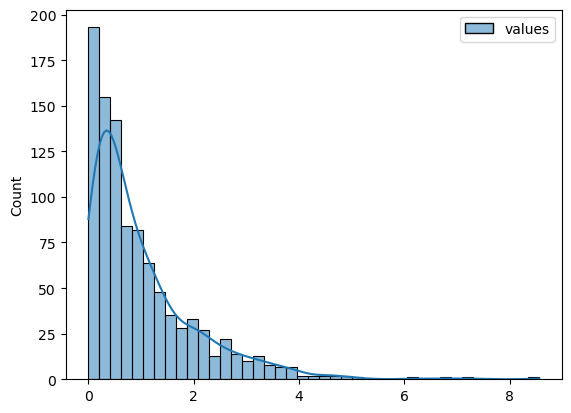

In [6]:
# Plot the Histogram using Seaborn
sns.histplot(df, kde=True)

## Power Transformation To Acess Box-Cox, Yeo-Johnson, and Quantile Transformation

### Box-Cox Transformation

> The Data should be 0 to +ve values.

In [7]:
from sklearn.preprocessing import PowerTransformer

# Make Box-Cox Transformation
pt = PowerTransformer(method='box-cox')
transformed_data = pt.fit_transform(df)

# Convert this in DataFrame
df = pd.DataFrame(transformed_data, columns=['values'])
df

,values
0,0.158969
1,0.602906
2,0.298068
3,0.148897
4,-0.164776
...,...
995,-1.326721
996,0.072154
997,1.506681
998,-0.744179


<Axes: ylabel='Count'>

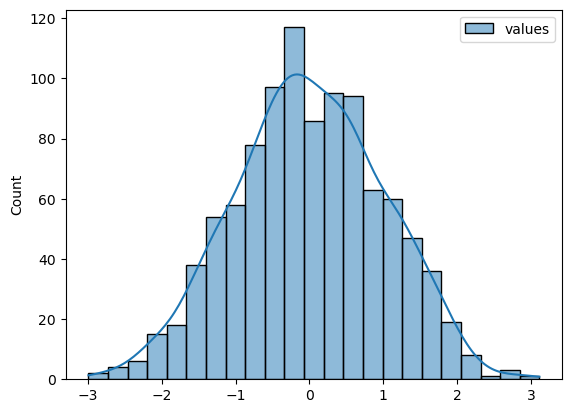

In [8]:
# Visualize the Data
sns.histplot(df, kde=True)

### Yeo-Johnson Transformation

In [9]:
from sklearn.preprocessing import PowerTransformer

# Make Box-Cox Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df)

# Convert this in DataFrame
df = pd.DataFrame(transformed_data, columns=['values'])
df

,values
0,0.153883
1,0.599957
2,0.293416
3,0.143789
4,-0.169869
...,...
995,-1.322621
996,0.066921
997,1.513415
998,-0.746143


<Axes: ylabel='Count'>

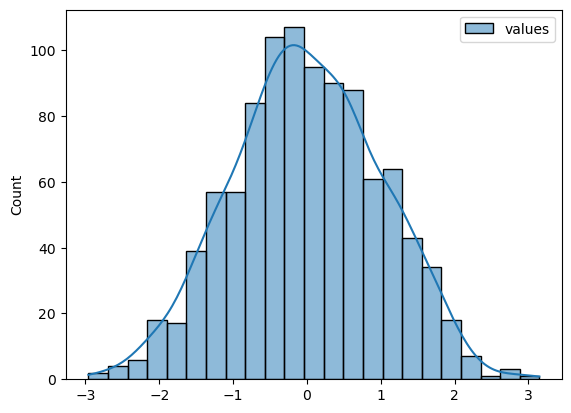

In [10]:
# Visualize the Data
sns.histplot(df, kde=True)

### Quantile Transformation

In [11]:
# Make Gaussian Distribution
np.random.seed(0)
data = np.random.normal(size = 1000)

# Convert this in DataFrame
df = pd.DataFrame(data, columns=['values'])
df

,values
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
...,...
995,0.412871
996,-0.198399
997,0.094192
998,-1.147611


<Axes: ylabel='Count'>

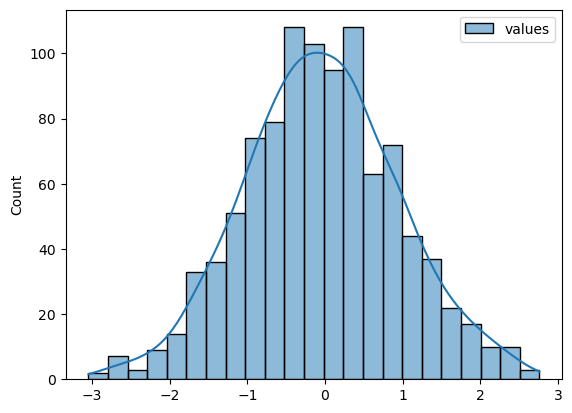

In [12]:
# Visualize the Data
sns.histplot(df, kde=True)

In [17]:
# Make Quanitle Transformation
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform', random_state=0)
transformed_data = qt.fit_transform(df)

# Convert this in DataFrame
df = pd.DataFrame(transformed_data, columns=['values'])
df

,values
0,0.961962
1,0.684685
2,0.856857
3,0.986987
4,0.966967
...,...
995,0.694695
996,0.444444
997,0.563564
998,0.130130


<Axes: ylabel='Count'>

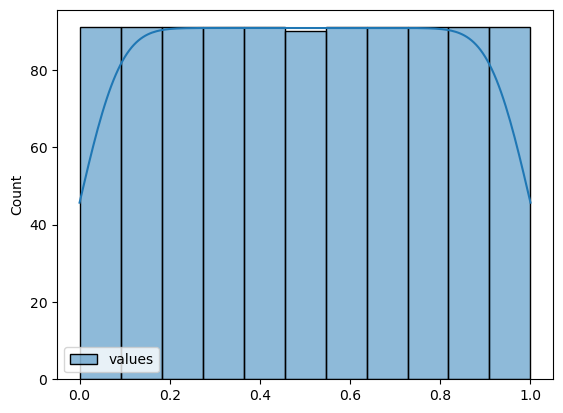

In [18]:
# Visualize the data
sns.histplot(df, kde=True)

-----

# Normalization

**`What is Normalization`**?

Normalization is the process of scaling the data so that all of the features have a mean of 0 and a standard deviation of 1. This is done to help improve the performance of machine learning models. Normalization is often used in machine learning algorithms to help prevent the model from being overfitting to the data.

**`Why is Normalization Important?`**

Normalization is important because it helps to standardize the data so that all of the features have a mean of 0 and a standard deviation of 1. This is done to help improve the performance of machine learning models. Normalization is often used in machine learning algorithms to help prevent the model from being overfitting to the data.



In [22]:
import numpy as np
from sklearn.preprocessing import Normalizer

# Sample data: each row represents a sample, and each column represents a feature
data = np.array([[4.0, 1.0, 2.0, 2.0],
                 [1.0, 3.0, 9.0, 3.0],
                 [5.0, 7.0, 5.0, 1.0]])

# Initialize the Normalizer
normalizer = Normalizer()

# Transform the data using the normalizer
normalized_data = normalizer.fit_transform(data)

# Print the original data
print("Original Data:")
print(data)

# Print the normalized data
print("\nNormalized Data:")
print(normalized_data)

Original Data:
[[4. 1. 2. 2.]
 [1. 3. 9. 3.]
 [5. 7. 5. 1.]]

Normalized Data:
[[0.8 0.2 0.4 0.4]
 [0.1 0.3 0.9 0.3]
 [0.5 0.7 0.5 0.1]]


## L1 and L2 Normalization

Normalization is a technique used to adjust the values of numerical data into a common scale, without distorting differences in the ranges of values. It is commonly used in machine learning preprocessing to ensure that all features contribute equally to the result.

### L1 Normalization

- **Definition**: L1 normalization scales each sample (row) so that the sum of the absolute values of its components is equal to 1.
- **Formula**: For a vector $$ \mathbf{x} $$, the L1 norm is calculated as:

  $$\|\mathbf{x}\|_1 = \sum_{i=1}^{n} |x_i|$$

  Each component of the normalized vector is given by:

  $$x_i' = \frac{x_i}{\|\mathbf{x}\|_1}$$

- **Use Cases**: L1 normalization is particularly useful when the data is sparse (many zeros) because it retains the sparsity of the data.

### L2 Normalization

- **Definition**: L2 normalization scales each sample (row) so that the sum of the squares of its components is equal to 1. This is also known as unit norm or Euclidean norm.
- **Formula**: For a vector $$ \mathbf{x} $$, the L2 norm is calculated as:

  $$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^{n} x_i^2}$$

  Each component of the normalized vector is given by:

  $$x_i' = \frac{x_i}{\|\mathbf{x}\|_2}$$

- **Use Cases**: L2 normalization is commonly used in machine learning when dealing with linear models, as it ensures that the length of the feature vectors is consistent, which can lead to better model performance.

### Example:

Given a sample dataset:

$$
\begin{bmatrix}
4.0 & 1.0 & 2.0 & 2.0 \\
1.0 & 3.0 & 9.0 & 3.0 \\
5.0 & 7.0 & 5.0 & 1.0
\end{bmatrix}
$$

- **L1 Normalized Data**:

$$
\begin{bmatrix}
0.5 & 0.125 & 0.25 & 0.25 \\
0.0667 & 0.2 & 0.6 & 0.2 \\
0.2778 & 0.3889 & 0.2778 & 0.0556
\end{bmatrix}
$$

- **L2 Normalized Data**:

$$
\begin{bmatrix}
0.8 & 0.2 & 0.4 & 0.4 \\
0.0891 & 0.2673 & 0.8018 & 0.2673 \\
0.4767 & 0.6674 & 0.4767 & 0.0953
\end{bmatrix}
$$


In [24]:
import numpy as np
from sklearn.preprocessing import Normalizer

# Sample data: each row represents a sample, and each column represents a feature
data = np.array([[4.0, 1.0, 2.0, 2.0],
                 [1.0, 3.0, 9.0, 3.0],
                 [5.0, 7.0, 5.0, 1.0]])

# Initialize the Normalizer with norm='l1'
l1_normalizer = Normalizer(norm='l1')

# Transform the data using the L1 normalizer
l1_normalized_data = l1_normalizer.fit_transform(data)

# Print the original data
print("Original Data:")
print(data)

# Print the L1 normalized data
print("\nL1 Normalized Data:")
print(l1_normalized_data)

Original Data:
[[4. 1. 2. 2.]
 [1. 3. 9. 3.]
 [5. 7. 5. 1.]]

L1 Normalized Data:
[[0.44444444 0.11111111 0.22222222 0.22222222]
 [0.0625     0.1875     0.5625     0.1875    ]
 [0.27777778 0.38888889 0.27777778 0.05555556]]


In [27]:
import numpy as np
from sklearn.preprocessing import Normalizer

# Sample data: each row represents a sample, and each column represents a feature
data = np.array([[4.0, 1.0, 2.0, 2.0],
                 [1.0, 3.0, 9.0, 3.0],
                 [5.0, 7.0, 5.0, 1.0]])

# Initialize the Normalizer with norm='l2'
l2_normalizer = Normalizer(norm='l2')

# Transform the data using the L2 normalizer
l2_normalized_data = l2_normalizer.fit_transform(data)

# Print the original data
print("Original Data:")
print(data)

# Print the L2 normalized data
print("\nL2 Normalized Data:")
print(l2_normalized_data)

Original Data:
[[4. 1. 2. 2.]
 [1. 3. 9. 3.]
 [5. 7. 5. 1.]]

L2 Normalized Data:
[[0.8 0.2 0.4 0.4]
 [0.1 0.3 0.9 0.3]
 [0.5 0.7 0.5 0.1]]


## Log Transformation

Log transformation is a mathematical operation used to adjust the scale of data by applying a logarithmic function. It is particularly useful in handling skewed data and reducing the impact of large values or outliers. Log transformation can help in stabilizing variance and making patterns in the data more interpretable.

### Definition

A log transformation applies the logarithm function to each value in the dataset. It can be expressed mathematically as:

$$
x' = \log(x + c)
$$

where:
- \( x \) is the original value,
- \( x' \) is the transformed value,
- \( c \) is a constant added to avoid taking the logarithm of zero or negative values (commonly \( c = 1 \)).

### Why Use Log Transformation?

1. **Reducing Skewness**: Log transformation can help in normalizing skewed data, making it more symmetric.
2. **Handling Outliers**: It can reduce the influence of large outliers by compressing the scale of high values.
3. **Variance Stabilization**: It can stabilize the variance of data that exhibit increasing variance with increasing mean.

### Example

Given a sample dataset:

$$
\begin{bmatrix}
1 & 10 & 100 & 1000 \\
2 & 20 & 200 & 2000 \\
3 & 30 & 300 & 3000
\end{bmatrix}
$$

Applying a log transformation with \( c = 1 \) (i.e., \( x' = \log(x + 1) \)):

$$
\begin{bmatrix}
\log(1 + 1) & \log(10 + 1) & \log(100 + 1) & \log(1000 + 1) \\
\log(2 + 1) & \log(20 + 1) & \log(200 + 1) & \log(2000 + 1) \\
\log(3 + 1) & \log(30 + 1) & \log(300 + 1) & \log(3000 + 1)
\end{bmatrix}
$$

Which results in:

$$
\begin{bmatrix}
\log(2) & \log(11) & \log(101) & \log(1001) \\
\log(3) & \log(21) & \log(201) & \log(2001) \\
\log(4) & \log(31) & \log(301) & \log(3001)
\end{bmatrix}
$$

In [30]:
# Sample data to show Log Transformation
data = np.array([4.0, 1.0, 2.0, 2.0, 10.0, 123.0, 210.0, 3210.0])

# Initialize the Log Transformer
log_transformer = np.log(data)

# Print the original data
print("Original Data:")
print(data)

# Print the log transformed data
print("\nLog Transformed Data:")
print(log_transformer)

Original Data:
[4.00e+00 1.00e+00 2.00e+00 2.00e+00 1.00e+01 1.23e+02 2.10e+02 3.21e+03]

Log Transformed Data:
[1.38629436 0.         0.69314718 0.69314718 2.30258509 4.81218436
 5.34710753 8.07402622]


<Axes: ylabel='Count'>

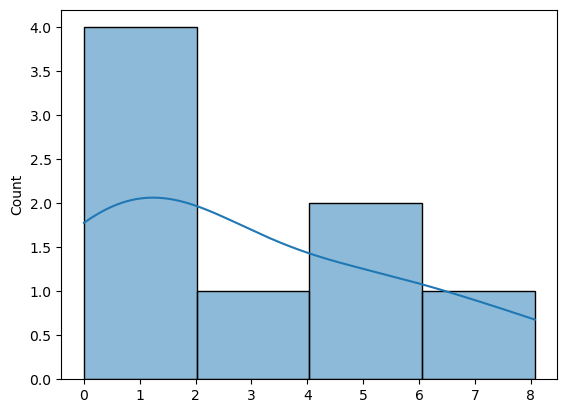

In [31]:
# Visualize the data
sns.histplot(log_transformer, kde=True)